# Initial Data Exploration

<center><img src="../references/banner.png" alt="A title at the top, and 3 groups of people of different ages each group." title="Customer Segmentation" height=350 width=600></center>

We are going to make an initial data exploration to understand our dataset. The dataset was extracted from kaggle [here](https://www.kaggle.com/datasets/imakash3011/customer-personality-analysis). Download and save it on '../data/raw' folder to run this jupyter notebook correctly.

So, in this notebook, we are going to:
* Load and see the entire dataset info to define some tasks;
* Clean data;
* Remove outliers;
* Have an overview of the data;
* Save transformations to the next notebook - The Exploratory Data Analysis notebook.

## Overview

First, we will have a quick overview of the dataset to define some tasks to make an initial data exploration.


<i> import the libraries </i>

In [2]:
# Code here
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# config pandas to show all columns
pd.set_option('display.max_columns', 100)
pd.set_option("display.max_info_rows", 100)

<i>Read the raw data</i>

In [3]:
# read the raw data
data = pd.read_csv('../data/raw/marketing_campaign.csv', sep='\t')

<i>Show the first rows to check if the file was correctly loaded.</i>

In [4]:
data.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0


<i>Understanding the columns and its description.</i>

There are 29 columns divided into the following categories:

<center><img src='../references/column_description.png' height=600 width=1000></center>
<br>
<i>Checking null values and data types</i>

In [5]:
data.info(verbose=True, show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

Now, we can define some tasks to start the data exporation:
* Income has a few null values;
* Dt_Customer Dtype is not correct;
* Check the unique values for the following columns: Education, Marital_Status;
* Eventually, simplify Education and Marital_Status values to simpler ones;
* Create new columns in the feature engineering section;
* Plot big graph of the numeric columns;

## Data cleaning

First, let's see how many null values we have.

In [6]:
num_values = data['Income'].isna().sum()
total = data.shape[0]
print('There are 24 income null values.')
print(f'This 24 rows represents {100*num_values/total:.2f}% of the total dataset')

There are 24 income null values.
This 24 rows represents 1.07% of the total dataset


So, for now, I will remove these null values:

In [7]:
dataframe_clean = data.dropna().copy()

<i>Checking if everything went well</i>

In [8]:
dataframe_clean.info(verbose=True, show_counts=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2216 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2216 non-null   int64  
 1   Year_Birth           2216 non-null   int64  
 2   Education            2216 non-null   object 
 3   Marital_Status       2216 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2216 non-null   int64  
 6   Teenhome             2216 non-null   int64  
 7   Dt_Customer          2216 non-null   object 
 8   Recency              2216 non-null   int64  
 9   MntWines             2216 non-null   int64  
 10  MntFruits            2216 non-null   int64  
 11  MntMeatProducts      2216 non-null   int64  
 12  MntFishProducts      2216 non-null   int64  
 13  MntSweetProducts     2216 non-null   int64  
 14  MntGoldProds         2216 non-null   int64  
 15  NumDealsPurchases    2216 non-null   i

Now, we have to correct the Dt_Customer type:

In [9]:
dataframe_clean['Dt_Customer'] = pd.to_datetime(dataframe_clean['Dt_Customer'], dayfirst=True)
dataframe_clean['Dt_Customer'].info()

<class 'pandas.core.series.Series'>
Int64Index: 2216 entries, 0 to 2239
Series name: Dt_Customer
Non-Null Count  Dtype         
--------------  -----         
2216 non-null   datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 34.6 KB


#### Checking unique Education and Marital_Status values

<i>Check unique education values</i>

In [10]:
dataframe_clean['Education'].unique()

array(['Graduation', 'PhD', 'Master', 'Basic', '2n Cycle'], dtype=object)

<i>Check unique marital status values</i>

In [11]:
dataframe_clean['Marital_Status'].unique()

array(['Single', 'Together', 'Married', 'Divorced', 'Widow', 'Alone',
       'Absurd', 'YOLO'], dtype=object)

So, we can see there are various levels of education and marital status. In this problem, this granularity might not be so important, so I will simplifly these to values that get the same idea:

In [12]:
education_dict = {
    'Graduation': 'Higher education',
    'PhD': 'Higher education',
    'Master': 'Higher education',
    'Basic': 'Basic education',
    '2n Cycle': 'Basic education'
}

marital_status_dict = {
    'Single': 'Alone',
    'Together': 'Pair',
    'Married': 'Pair',
    'Divorced': 'Alone',
    'Widow': 'Alone',
    'Absurd': 'Alone',
    'Alone': 'Alone',
    'YOLO': 'Alone',
}

In [13]:
dataframe_clean['Education'] = dataframe_clean['Education'].apply(lambda x: education_dict[x])

In [14]:
dataframe_clean['Marital_Status'] = dataframe_clean['Marital_Status'].apply(lambda x: marital_status_dict[x])

In [15]:
dataframe_clean.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Higher education,Alone,58138.0,0,0,2012-09-04,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Higher education,Alone,46344.0,1,1,2014-03-08,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Higher education,Pair,71613.0,0,0,2013-08-21,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Higher education,Pair,26646.0,1,0,2014-02-10,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0
4,5324,1981,Higher education,Pair,58293.0,1,0,2014-01-19,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0


### Feature Engineering

Now, we are going to create a few columns based on the dataset. First, let's take another look at our data:

In [16]:
dataframe_clean.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Higher education,Alone,58138.0,0,0,2012-09-04,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Higher education,Alone,46344.0,1,1,2014-03-08,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Higher education,Pair,71613.0,0,0,2013-08-21,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Higher education,Pair,26646.0,1,0,2014-02-10,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0
4,5324,1981,Higher education,Pair,58293.0,1,0,2014-01-19,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0


We are going to create:
* Column Age based on year_birth and most recent Dt_Customer (this is an old dataset, so we are considering the most recent date of this dataset as the current date);
* Column Children based on Kidhome and Teenhome
* Column TotalMembers based on Marital_Status and Children;
* Column TotalSpent based on all products.

In [17]:
# Age column
current_year = dataframe_clean['Dt_Customer'].max().year
dataframe_clean['Age'] = dataframe_clean['Year_Birth'].apply(lambda x: current_year-x)

# Children column
dataframe_clean['Children'] = dataframe_clean['Kidhome'] + dataframe_clean['Teenhome']

# TotalMembers column
dataframe_clean['TotalMembers'] = dataframe_clean['Children'] + dataframe_clean['Marital_Status'].replace({'Alone': 1, 'Pair': 2})

# TotalSpent
dataframe_clean['TotalSpent'] = dataframe_clean['MntWines'] + dataframe_clean['MntFruits'] + dataframe_clean['MntMeatProducts']\
                                + dataframe_clean['MntFishProducts'] + dataframe_clean['MntSweetProducts'] + dataframe_clean['MntGoldProds']

Now that we finished our feature engineering, let's take a look at the data again, now looking at some statistical metrics:

In [18]:
dataframe_clean.describe()

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Age,Children,TotalMembers,TotalSpent
count,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.0,2216.0,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000
mean,5588.353339,1968.820397,52247.251354,0.441787,0.505415,49.012635,305.091606,26.356047,166.995939,37.637635,27.028881,43.965253,2.323556,4.085289,2.671029,5.800993,5.319043,0.073556,0.074007,0.073105,0.064079,0.013538,0.009477,3.0,11.0,0.150271,45.179603,0.947202,2.592509,607.075361
std,3249.376275,11.985554,25173.076661,0.536896,0.544181,28.948352,337.327920,39.793917,224.283273,54.752082,41.072046,51.815414,1.923716,2.740951,2.926734,3.250785,2.425359,0.261106,0.261842,0.260367,0.244950,0.115588,0.096907,0.0,0.0,0.357417,11.985554,0.749062,0.905722,602.900476
min,0.000000,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000,18.000000,0.000000,1.000000,5.000000
25%,2814.750000,1959.000000,35303.000000,0.000000,0.000000,24.000000,24.000000,2.000000,16.000000,3.000000,1.000000,9.000000,1.000000,2.000000,0.000000,3.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000,37.000000,0.000000,2.000000,69.000000
50%,5458.500000,1970.000000,51381.500000,0.000000,0.000000,49.000000,174.500000,8.000000,68.000000,12.000000,8.000000,24.500000,2.000000,4.000000,2.000000,5.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000,44.000000,1.000000,3.000000,396.500000
75%,8421.750000,1977.000000,68522.000000,1.000000,1.000000,74.000000,505.000000,33.000000,232.250000,50.000000,33.000000,56.000000,3.000000,6.000000,4.000000,8.000000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000,55.000000,1.000000,3.000000,1048.000000
max,11191.000000,1996.000000,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,262.000000,321.000000,15.000000,27.000000,28.000000,13.000000,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.0,11.0,1.000000,121.000000,3.000000,5.000000,2525.000000


Well, Year_Birth, Income and Age (equals to current_year - Year_Birth) has outliers. There are some really old people that should not exist. There are high incomes that are too much for an normal income.

So, we are going to visualize this columns to see how to deal with them

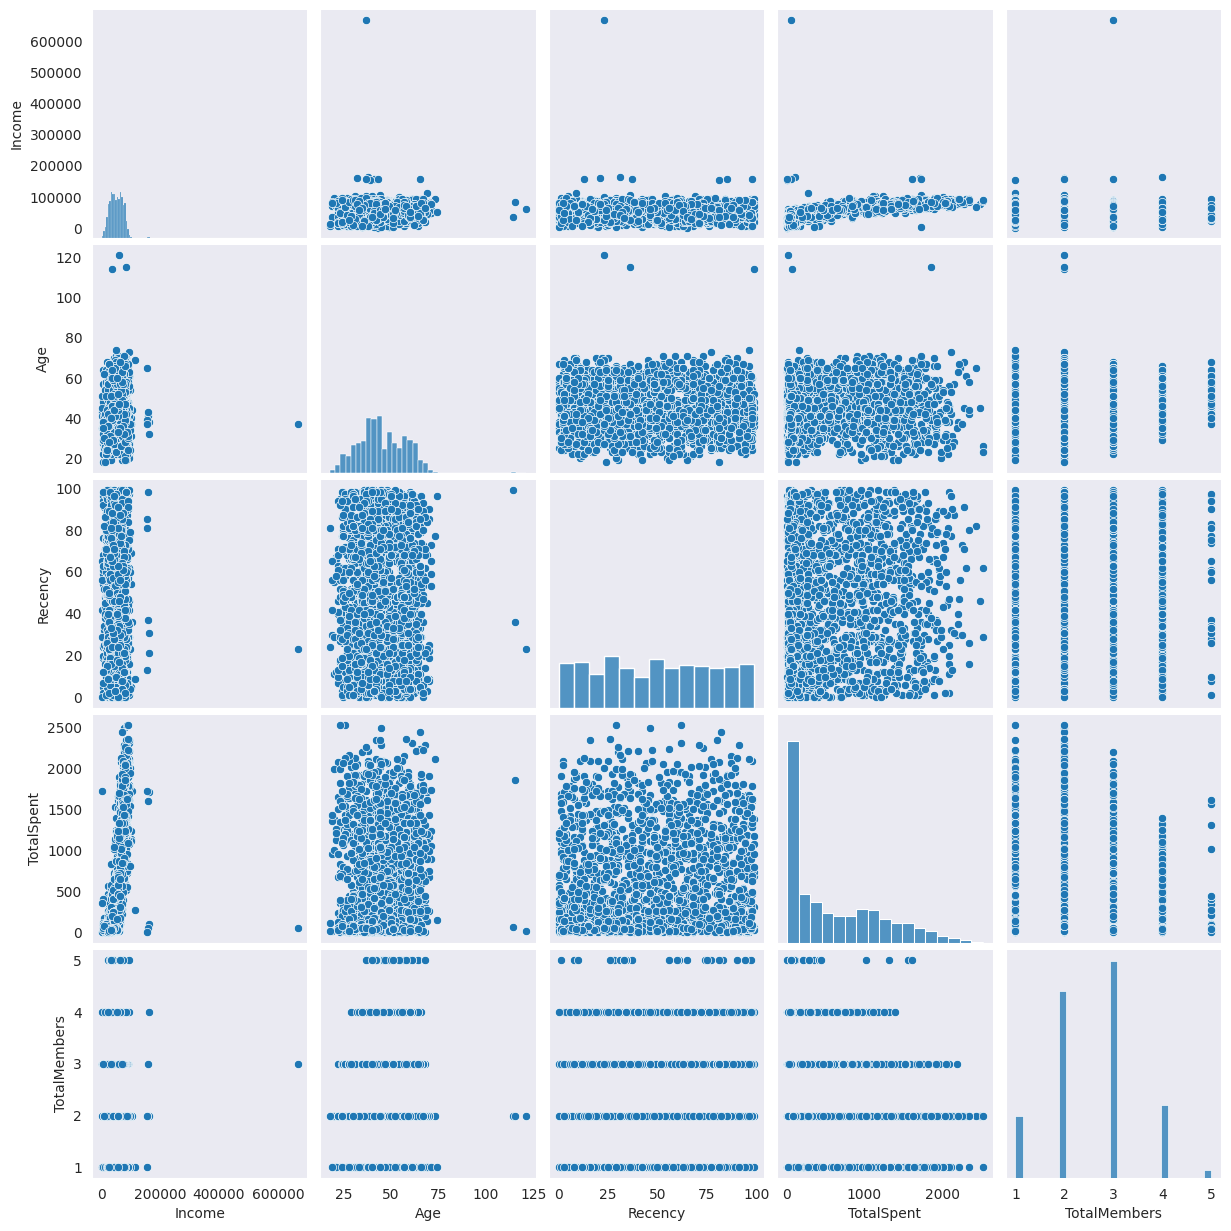

In [19]:
sns.set_style("dark")
sns.color_palette("Paired")
columns_to_plot = ['Income', 'Age', 'Recency', 'TotalSpent', 'TotalMembers']
# dataframe_clean[columns_to_plot]
sns.pairplot(dataframe_clean[columns_to_plot])

As we can see, Income and Age really has outliers. There are many ways to deal with outliers. In this project, we are going to eliminate them by defining a threshold:

In [20]:
# Age less than 90
dataframe_clean = dataframe_clean[dataframe_clean['Age'] < 90]

# Income less than 300k
dataframe_clean = dataframe_clean[dataframe_clean['Income'] < 300000]

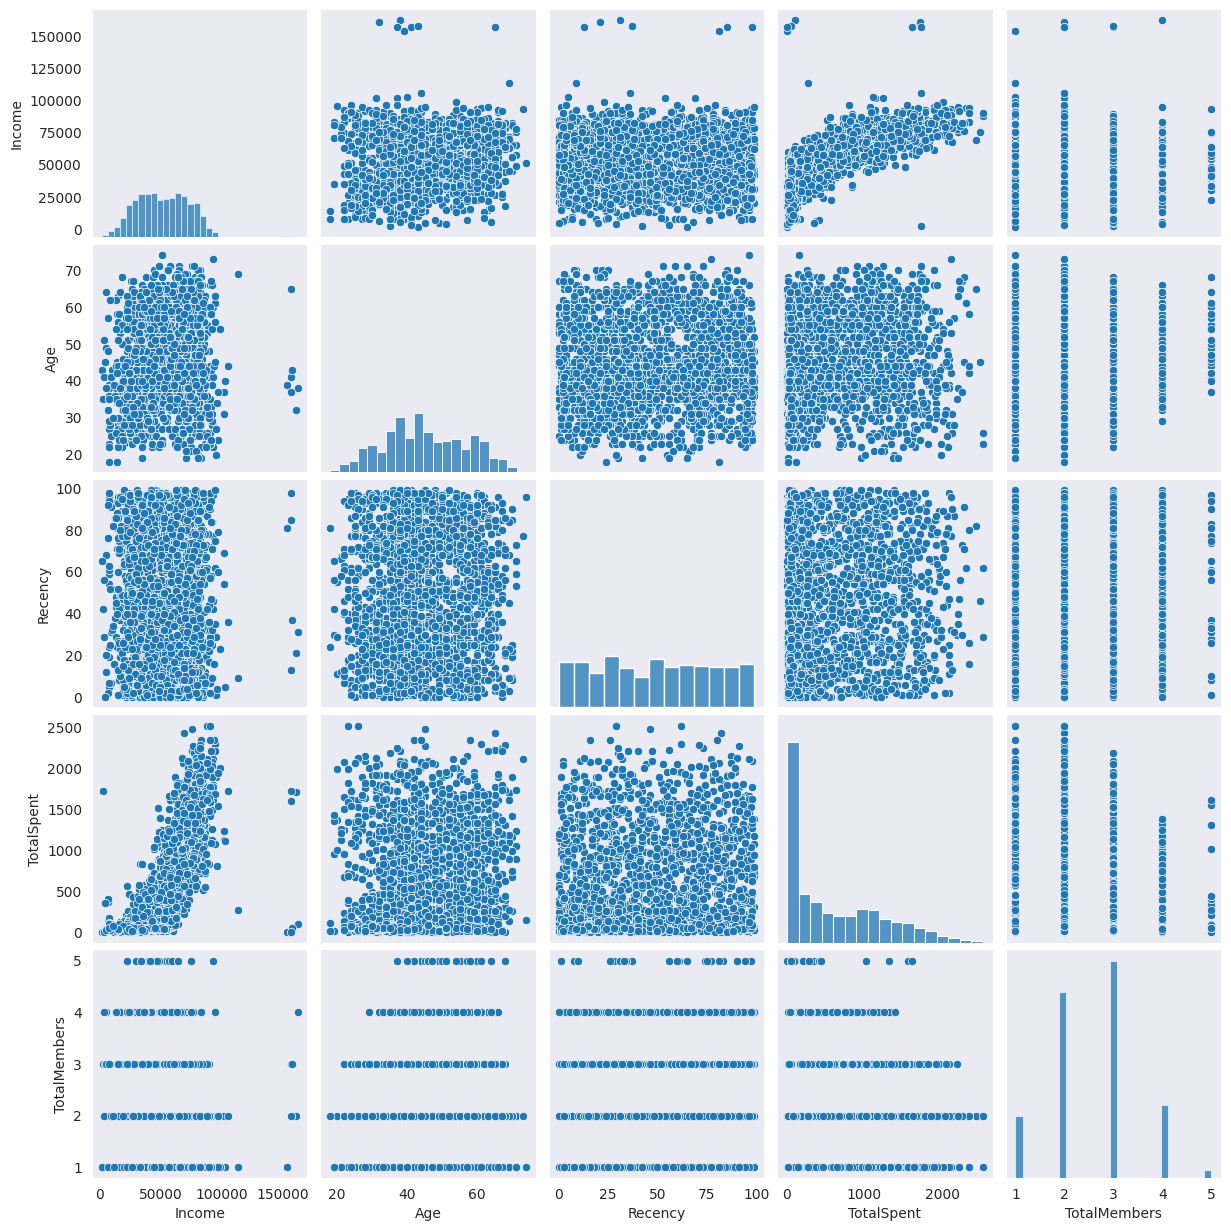

In [21]:
sns.set_style("dark")
sns.color_palette("Paired")
columns_to_plot = ['Income', 'Age', 'Recency', 'TotalSpent', 'TotalMembers']
# dataframe_clean[columns_to_plot]
sns.pairplot(dataframe_clean[columns_to_plot])

In [30]:
dataframe_clean.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response',
       'Age', 'Children', 'TotalMembers', 'TotalSpent'],
      dtype='object')

<Axes: >

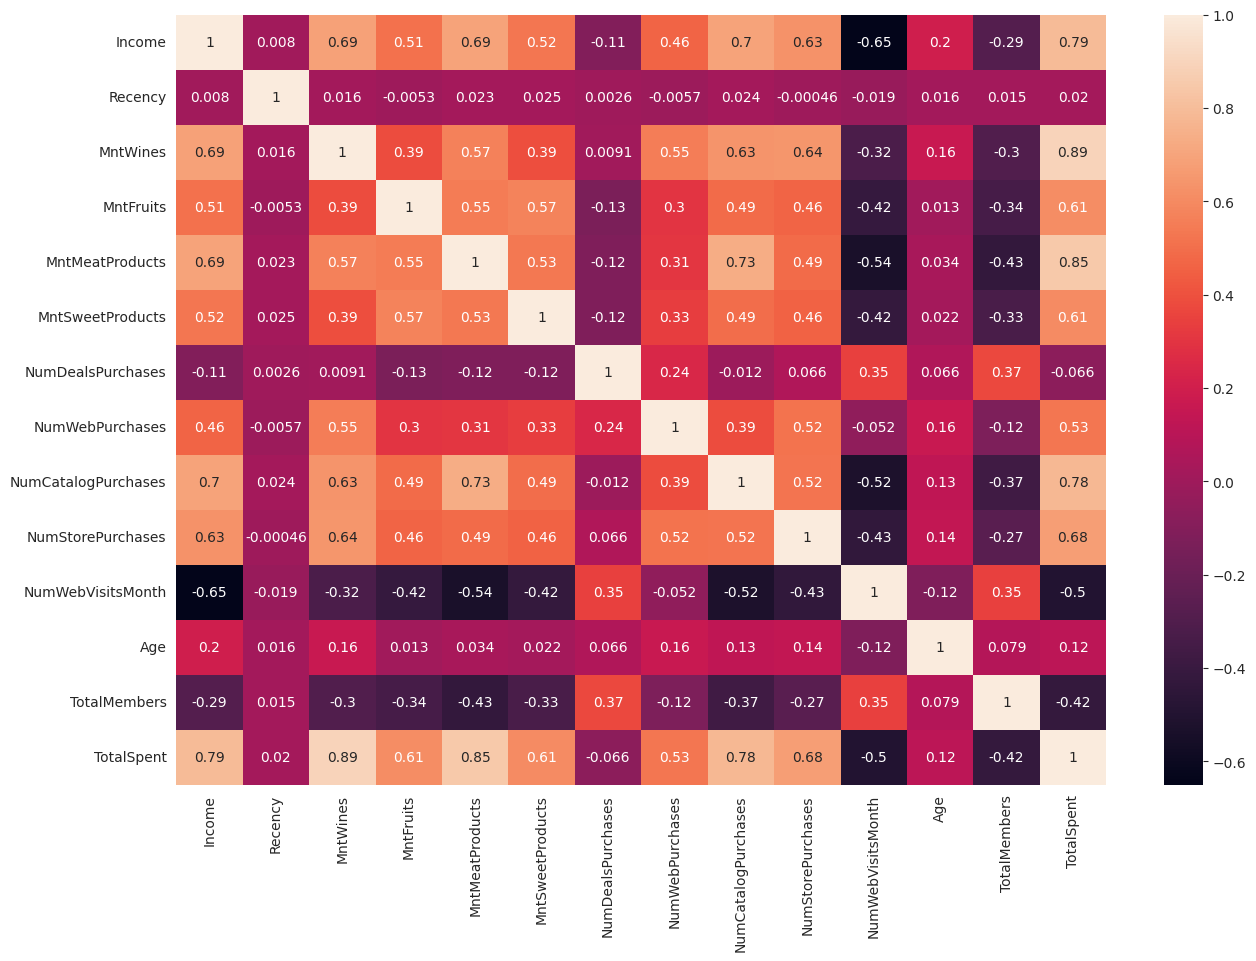

In [33]:
columns_to_plot = ['Income', 'Recency', 'MntWines', 'MntFruits', 'MntMeatProducts',
                   'MntSweetProducts', 'NumDealsPurchases', 'NumWebPurchases',
                   'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
                   'Age', 'TotalMembers', 'TotalSpent']

corr = dataframe_clean[columns_to_plot].corr()
plt.figure(figsize=(15,10))
sns.heatmap(corr, annot=True)